# 0. Imports and initializations

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data normalization and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for models
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from keras.utils.vis_utils import plot_model
import keras_tuner

# for plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# for file management
from os.path import exists
from os import remove

# for sequences
WINDOW_SIZE = 30  # 10 seconds sequences in 5 minutes
WINDOW_SHIFT = 6  # 10 seconds sequences in 1 minute

# for models fit
EPOCHS = 25
BATCH_SIZE = 32

plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

# 1. Next Value Prediction Task

## 1.1 Utility functions

### 1.1.1 <code>features_and_lables</code>
Given the normalized data, the function will produce sequencies of specific window size window shift.

In [2]:
def features_and_labels(data, window_size: int = 30, window_shift: int = 6):
  """
  Given the data, the function will produce sequencies of specific
  window size window shift.
  """

  features = []
  labels = []

  for i in range(window_size, len(data), window_shift):
    features.append(np.reshape(data[i - window_size:i], (1, -1))[0])
    labels.append(data[i])
  features, labels = np.array(features), np.array(labels)

  return features, labels

### 1.1.2 <code>build_model</code>
Given in input the features, the model will be fitted to the input shape. Moreover, this model will have a single output node.

In [3]:
def build_model(input_shape, units_1, units_2, units_3, units_4, learning_rate):
  """
  The function builds the model, given in input the parameters.
  """

  model = models.Sequential(name='Sequential')
  model.add(layers.Input(input_shape, name='Input'))
  model.add(layers.LSTM(units=units_1, return_sequences=True, name='LSTM-1'))
  model.add(layers.Dropout(0.2, name='Dropout-1'))
  model.add(layers.LSTM(units=units_1, return_sequences=True, name='LSTM-2'))
  model.add(layers.Dropout(0.2, name='Dropout-2'))
  model.add(layers.LSTM(units=units_1, name='LSTM-3'))
  model.add(layers.Dropout(0.2, name='Dropout-3'))
  model.add(layers.Dense(units=units_2, activation='relu', name='Dense-1'))
  model.add(layers.Dropout(0.2, name='Dropout-4'))
  model.add(layers.Dense(units=units_3, activation='relu', name='Dense-2'))
  model.add(layers.Dropout(0.2, name='Dropout-5'))
  model.add(layers.Dense(units=units_4, activation='relu', name='Dense-3'))
  model.add(layers.Dropout(0.2, name='Dropout-6'))
  model.add(layers.Dense(units=1, name='Dense-final'))
  model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss=losses.mse, metrics=[metrics.mae])

  return model

### 1.1.3 <code>denormalize</code>
Given in input a value and the scaler used for the normalization, the function returns the denormalized value

In [4]:
def denormalize(value: float, scaler: StandardScaler):
  """
  Given in input the mean absolute error and the scaler used for the
  normalization, the function returns the denormalized value
  """

  return (scaler.inverse_transform(np.reshape(np.array([value]), (-1, 1))))[0][0]

### 1.1.4 <code>model_builder</code>
The function is used for searching the best model to be used

In [5]:
def model_builder(hp):
  """
  The function is used for searching the best model to be used
  """

  hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=16)  # for LSTMs
  hp_units_2 = hp.Int('units_2', min_value=32, max_value=256, step=16)  # for first dense
  hp_units_3 = hp.Int('units_3', min_value=32, max_value=256, step=16)  # for second dense
  hp_units_4 = hp.Int('units_4', min_value=32, max_value=256, step=16)  # for third dense
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model = models.Sequential(name='Sequential')
  model.add(layers.Input((30, 1), name='Input'))
  model.add(layers.LSTM(units=hp_units_1, return_sequences=True, name='LSTM-1'))
  model.add(layers.Dropout(0.2, name='Dropout-1'))
  model.add(layers.LSTM(units=hp_units_1, return_sequences=True, name='LSTM-2'))
  model.add(layers.Dropout(0.2, name='Dropout-2'))
  model.add(layers.LSTM(units=hp_units_1, name='LSTM-3'))
  model.add(layers.Dropout(0.2, name='Dropout-3'))
  model.add(layers.Dense(units=hp_units_2, activation='relu', name='Dense-1'))
  model.add(layers.Dropout(0.2, name='Dropout-4'))
  model.add(layers.Dense(units=hp_units_3, activation='relu', name='Dense-2'))
  model.add(layers.Dropout(0.2, name='Dropout-5'))
  model.add(layers.Dense(units=hp_units_4, activation='relu', name='Dense-3'))
  model.add(layers.Dropout(0.2, name='Dropout-6'))
  model.add(layers.Dense(units=1, name='Dense-final'))
  model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate), loss=losses.mse, metrics=[metrics.mae])

  return model

### 1.1.5 <code>model_builder_three</code>

The function is used for searching the best model to be used

In [6]:
def model_builder_three(hp):
  """
  The function is used for searching the best model to be used
  """

  hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=16)  # for LSTMs
  hp_units_2 = hp.Int('units_2', min_value=32, max_value=256, step=16)  # for first dense
  hp_units_3 = hp.Int('units_3', min_value=32, max_value=256, step=16)  # for second dense
  hp_units_4 = hp.Int('units_4', min_value=32, max_value=256, step=16)  # for third dense
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model = models.Sequential(name='Sequential')
  model.add(layers.Input((30, 3), name='Input'))
  model.add(layers.LSTM(units=hp_units_1, return_sequences=True, name='LSTM-1'))
  model.add(layers.Dropout(0.2, name='Dropout-1'))
  model.add(layers.LSTM(units=hp_units_1, return_sequences=True, name='LSTM-2'))
  model.add(layers.Dropout(0.2, name='Dropout-2'))
  model.add(layers.LSTM(units=hp_units_1, name='LSTM-3'))
  model.add(layers.Dropout(0.2, name='Dropout-3'))
  model.add(layers.Dense(units=hp_units_2, activation='relu', name='Dense-1'))
  model.add(layers.Dropout(0.2, name='Dropout-4'))
  model.add(layers.Dense(units=hp_units_3, activation='relu', name='Dense-2'))
  model.add(layers.Dropout(0.2, name='Dropout-5'))
  model.add(layers.Dense(units=hp_units_4, activation='relu', name='Dense-3'))
  model.add(layers.Dropout(0.2, name='Dropout-6'))
  model.add(layers.Dense(units=3, name='Dense-final'))
  model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate), loss=losses.mse, metrics=[metrics.mae])

  return model

## 1.2 Fixed windows properties
We have 3 time series (X, Y, Z) recorded each 10 seconds
- Given a sequence of 5 minutes every one minute
- The goal is to predict the next value of the sequence for each time series
- Evaluation Metric: **Mean Absolute Error**


### 1.2.1 Loading the dataset

In [45]:
data = pd.read_csv('dataset_task_1/train.csv')

data.tail()

,x,y,z
144906,559,-803,-294
144907,559,-803,-294
144908,559,-802,-295
144909,559,-803,-294
144910,559,-802,-294


### 1.2.2 Reshaping columns
We separate each column, to process them in a separate way

In [8]:
x_data = np.reshape(data.x.to_numpy(), (-1, 1))
y_data = np.reshape(data.y.to_numpy(), (-1, 1))
z_data = np.reshape(data.z.to_numpy(), (-1, 1))

x_data

array([[ -24],
       [-206],
       [-139],
       ...,
       [ 559],
       [ 559],
       [ 559]])

### 1.2.3 Data preprocessing
We use the function <code>features_and_lables</code>, defined before, that helps with the transformation of data in sequences.

In [9]:
x_features, x_labels = features_and_labels(x_data, window_size=30, window_shift=6)
y_features, y_labels = features_and_labels(y_data, window_size=30, window_shift=6)
z_features, z_labels = features_and_labels(z_data, window_size=30, window_shift=6)

print(x_features[0])
print(x_labels[0])

[ -24 -206 -139 -503 -278  240 -671  -45  102   15  142    3 -176 -768
 -838 -420 -419 -420 -419 -418 -417 -414 -408 -407 -407 -408 -407 -408
 -408 -409]
[-408]


### 1.2.4 Data normalization
We use the standard scaler, in order to normalize features.

In [10]:
x_scaler = StandardScaler()
x_scaler.fit(x_features)
x_features = x_scaler.transform(x_features)

y_scaler = StandardScaler()
y_scaler.fit(y_features)
y_features = y_scaler.transform(y_features)

z_scaler = StandardScaler()
z_scaler.fit(z_features)
z_features = z_scaler.transform(z_features)

x_features[0]

array([-0.31846375, -0.69210742, -0.55333931, -1.29009094, -0.8330969 ,
        0.21812059, -1.63390757, -0.36431967, -0.06244556, -0.23752702,
        0.01981392, -0.26366122, -0.62766428, -1.83661042, -1.97735234,
       -1.12156197, -1.11954163, -1.12352781, -1.12177456, -1.12407862,
       -1.11992643, -1.10946296, -1.09729569, -1.09719701, -1.09747076,
       -1.10380867, -1.09964788, -1.09736257, -1.09738732, -1.10135407])

### 1.2.5 Splitting in training set and validation set

In [11]:
x_train_features, x_val_features, x_train_labels, x_val_labels = train_test_split(x_features, x_labels, test_size=0.2, random_state=7)
y_train_features, y_val_features, y_train_labels, y_val_labels = train_test_split(y_features, y_labels, test_size=0.2, random_state=7)
z_train_features, z_val_features, z_train_labels, z_val_labels = train_test_split(z_features, z_labels, test_size=0.2, random_state=7)

### 1.2.6 Hyperparameters search
We let the tuner look for the best parameters for each model.

In [12]:
# x
x_tuner = keras_tuner.Hyperband(model_builder,
                              objective='val_mean_absolute_error',
                              max_epochs=15,
                              factor=3,
                              directory='task_1.1/tuner',
                              project_name='x')

x_tuner.search(x_train_features, x_train_labels, validation_data=(x_val_features, x_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE)
x_best_hps = x_tuner.get_best_hyperparameters(num_trials=1)[0]

# y
y_tuner = keras_tuner.Hyperband(model_builder,
                              objective='val_mean_absolute_error',
                              max_epochs=15,
                              factor=3,
                              directory='task_1.1/tuner',
                              project_name='y')

y_tuner.search(y_train_features, y_train_labels, validation_data=(y_val_features, y_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE)
y_best_hps = y_tuner.get_best_hyperparameters(num_trials=1)[0]

z_tuner = keras_tuner.Hyperband(model_builder,
                              objective='val_mean_absolute_error',
                              max_epochs=15,
                              factor=3,
                              directory='task_1.1/tuner',
                              project_name='z')

z_tuner.search(z_train_features, z_train_labels, validation_data=(z_val_features, z_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE)
z_best_hps = z_tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Reloading Oracle from existing project task_1.1/tuner/x/oracle.json


2021-12-29 14:52:25.513387: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2021-12-29 14:52:25.513441: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-8VNS6LCU): /proc/driver/nvidia/version does not exist
2021-12-29 14:52:25.513790: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Reloading Tuner from task_1.1/tuner/x/tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project task_1.1/tuner/y/oracle.json
INFO:tensorflow:Reloading Tuner from task_1.1/tuner/y/tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project task_1.1/tuner/z/oracle.json
INFO:tensorflow:Reloading Tuner from task_1.1/tuner/z/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [13]:
print(f"""
The hyperparameter search is complete.
units_1:\tx: {x_best_hps.get('units_1')}\t\ty: {y_best_hps.get('units_1')}\t\tz: {z_best_hps.get('units_1')}
units_2:\tx: {x_best_hps.get('units_2')}\t\ty: {y_best_hps.get('units_2')}\t\tz: {z_best_hps.get('units_2')}
units_3:\tx: {x_best_hps.get('units_3')}\t\ty: {y_best_hps.get('units_3')}\t\tz: {z_best_hps.get('units_3')}
units_4:\tx: {x_best_hps.get('units_4')}\t\ty: {y_best_hps.get('units_4')}\t\tz: {z_best_hps.get('units_4')}
learning_rate:\tx: {x_best_hps.get('learning_rate')}\ty: {y_best_hps.get('learning_rate')}\tz: {z_best_hps.get('learning_rate')}
""")


The hyperparameter search is complete.
units_1:	x: 112		y: 208		z: 96
units_2:	x: 224		y: 208		z: 144
units_3:	x: 192		y: 192		z: 160
units_4:	x: 240		y: 240		z: 224
learning_rate:	x: 0.0001	y: 0.0001	z: 0.001



### 1.2.7 Models building and fitting

We build the models according to the parameters found by tuner, then fit the data.

In [14]:
x_model = x_tuner.hypermodel.build(x_best_hps)
y_model = y_tuner.hypermodel.build(y_best_hps)
z_model = z_tuner.hypermodel.build(z_best_hps)

plot_model(x_model, to_file='task_1.1/models/x_model.png', show_shapes=True, show_layer_names=True)
plot_model(y_model, to_file='task_1.1/models/y_model.png', show_shapes=True, show_layer_names=True)
plot_model(z_model, to_file='task_1.1/models/z_model.png', show_shapes=True, show_layer_names=True)

if not exists('task_1.1/models/x.index'):
    x_model_checkpoint_callback = callbacks.ModelCheckpoint('task_1.1/models/x', save_weights_only=True, monitor='val_mean_absolute_error', mode='min', save_best_only=True)
    x_history = x_model.fit(x_train_features, x_train_labels, validation_data=(x_val_features, x_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[x_model_checkpoint_callback])
    if exists('task_1.1/plots/x_loss.png'):
        remove('task_1.1/plots/x_loss.png')
    if exists('task_1.1/plots/x_mae.png'):
        remove('task_1.1/plots/x_mae.png')

if not exists('task_1.1/models/y.index'):
    y_model_checkpoint_callback = callbacks.ModelCheckpoint('task_1.1/models/y', save_weights_only=True, monitor='val_mean_absolute_error', mode='min', save_best_only=True)
    y_history = y_model.fit(y_train_features, y_train_labels, validation_data=(y_val_features, y_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[y_model_checkpoint_callback])
    if exists('task_1.1/plots/y_loss.png'):
        remove('task_1.1/plots/y_loss.png')
    if exists('task_1.1/plots/y_mae.png'):
        remove('task_1.1/plots/y_mae.png')

if not exists('task_1.1/models/z.index'):
    z_model_checkpoint_callback = callbacks.ModelCheckpoint('task_1.1/models/z', save_weights_only=True, monitor='val_mean_absolute_error', mode='min', save_best_only=True)
    z_history = z_model.fit(z_train_features, z_train_labels, validation_data=(z_val_features, z_val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[z_model_checkpoint_callback])
    if exists('task_1.1/plots/z_loss.png'):
        remove('task_1.1/plots/z_loss.png')
    if exists('task_1.1/plots/z_mae.png'):
        remove('task_1.1/plots/z_mae.png')

### 1.2.8 Plotting losses and metrics

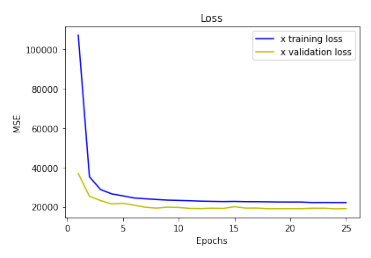

In [15]:
if not exists('task_1.1/plots/x_loss.png'):
    x_loss = x_history.history['loss']
    x_val_loss = x_history.history['val_loss']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, x_loss, 'b', label='x training loss')
    plt.plot(epochs, x_val_loss, 'y', label='x validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.savefig('task_1.1/plots/x_loss.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/x_loss.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

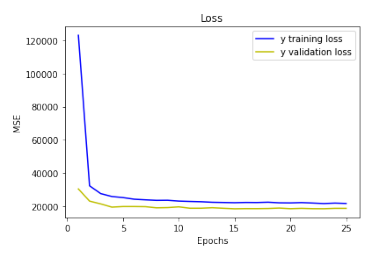

In [16]:
if not exists('task_1.1/plots/y_loss.png'):
    y_loss = y_history.history['loss']
    y_val_loss = y_history.history['val_loss']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, y_loss, 'b', label='y training loss')
    plt.plot(epochs, y_val_loss, 'y', label='y validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.savefig('task_1.1/plots/y_loss.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/y_loss.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

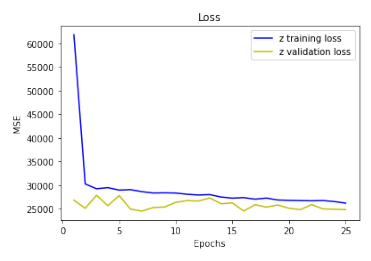

In [17]:
if not exists('task_1.1/plots/z_loss.png'):
    z_loss = z_history.history['loss']
    z_val_loss = z_history.history['val_loss']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, z_loss, 'b', label='z training loss')
    plt.plot(epochs, z_val_loss, 'y', label='z validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.savefig('task_1.1/plots/z_loss.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/z_loss.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

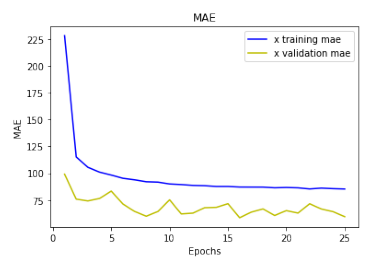

In [18]:
if not exists('task_1.1/plots/x_mae.png'):
    x_mae = x_history.history['mean_absolute_error']
    x_val_mae = x_history.history['val_mean_absolute_error']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, x_mae, 'b', label='x training mae')
    plt.plot(epochs, x_val_mae, 'y', label='x validation mae')
    plt.title('MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig('task_1.1/plots/x_mae.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/x_mae.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

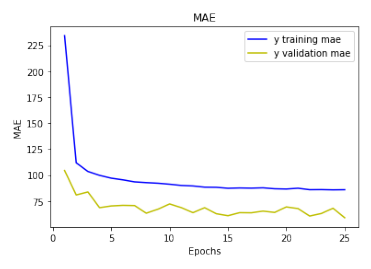

In [19]:
if not exists('task_1.1/plots/y_mae.png'):
    y_mae = y_history.history['mean_absolute_error']
    y_val_mae = y_history.history['val_mean_absolute_error']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, y_mae, 'b', label='y training mae')
    plt.plot(epochs, y_val_mae, 'y', label='y validation mae')
    plt.title('MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig('task_1.1/plots/y_mae.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/y_mae.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

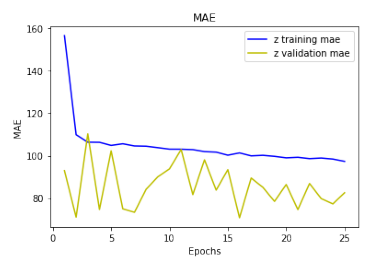

In [20]:
if not exists('task_1.1/plots/z_mae.png'):
    z_mae = z_history.history['mean_absolute_error']
    z_val_mae = z_history.history['val_mean_absolute_error']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, z_mae, 'b', label='z training mae')
    plt.plot(epochs, z_val_mae, 'y', label='z validation mae')
    plt.title('MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig('task_1.1/plots/z_mae.png')
    plt.show()
else:
    img = mpimg.imread('task_1.1/plots/z_mae.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

### 1.2.9 Evaluation

Targets:
- x = 81.06
- y = 85.26
- z = 79.94

In [21]:
test_data = pd.read_csv('dataset_task_1/test.csv')

x_test_data = np.reshape(test_data.x.to_numpy(), (-1, 1))
y_test_data = np.reshape(test_data.y.to_numpy(), (-1, 1))
z_test_data = np.reshape(test_data.z.to_numpy(), (-1, 1))

x_test_features, x_test_labels = features_and_labels(x_test_data, window_size=30, window_shift=6)
y_test_features, y_test_labels = features_and_labels(y_test_data, window_size=30, window_shift=6)
z_test_features, z_test_labels = features_and_labels(z_test_data, window_size=30, window_shift=6)

x_test_features = x_scaler.transform(x_test_features)
y_test_features = y_scaler.transform(y_test_features)
z_test_features = z_scaler.transform(z_test_features)

# Loading the best models for each time series
x_model.load_weights('task_1.1/models/x')
y_model.load_weights('task_1.1/models/y')
z_model.load_weights('task_1.1/models/z')

x_evaluation = x_model.evaluate(x_test_features, x_test_labels)[1]
y_evaluation = y_model.evaluate(y_test_features, y_test_labels)[1]
z_evaluation = z_model.evaluate(z_test_features, z_test_labels)[1]

print(f'x_mean_absolute_error:\t{x_evaluation}')
print(f'y_mean_absolute_error:\t{y_evaluation}')
print(f'z_mean_absolute_error:\t{z_evaluation}')

773/773 [==============================] - 18s 22ms/step - loss: 22666.8672 - mean_absolute_error: 78.3938
x_mean_absolute_error:	77.6206283569336
y_mean_absolute_error:	84.31108093261719
z_mean_absolute_error:	78.39376068115234


### 1.2.10 Predict some values
We predict some values to look at how good it is.

In [22]:
index = 1

print(f'x')
expected_prediction = x_test_labels[index]
test = np.reshape(x_test_features[index], (1, x_test_features[index].shape[0]))
actual_prediction = x_model.predict(test)[0]
print(f'expected prediction:\t{expected_prediction}')
print(f'actual prediction:\t{actual_prediction}')

print(f'y')
expected_prediction = y_test_labels[index]
test = np.reshape(y_test_features[index], (1, y_test_features[index].shape[0]))
actual_prediction = y_model.predict(test)[0]
print(f'expected prediction:\t{expected_prediction}')
print(f'actual prediction:\t{actual_prediction}')

print(f'z')
expected_prediction = z_test_labels[index]
test = np.reshape(z_test_features[index], (1, z_test_features[index].shape[0]))
actual_prediction = z_model.predict(test)[0]
print(f'expected prediction:\t{expected_prediction}')
print(f'actual prediction:\t{actual_prediction}')

x
expected prediction:	[576]
actual prediction:	[580.3734]
y
expected prediction:	[-407]
actual prediction:	[-419.1903]
z
expected prediction:	[-730]
actual prediction:	[-713.19415]


## 1.3 Best window size and window shift selection
Now we need to try to find the best <code>window_size</code> and <code>window_shift</code> that better fit the model of one of the time series. We choose the y time series.

### 1.3.1 Definition of search space

In [23]:
window_sizes = [
 18,  # 10 seconds sequences in 3 minutes
 24,  # 10 seconds sequences in 4 minutes
 30,  # 10 seconds sequences in 5 minutes
 36,  # 10 seconds sequences in 6 minutes
 42,  # 10 seconds sequences in 7 minutes
]

window_shifts = [
 1,  # 10 seconds shift
 3,  # 30 seconds shift
 6,  # 1 minute shift
 9,  # 1 minute and 30 seconds shift
]

### 1.3.2 Model building, fitting and evaluation
For each combination, we build the model, fit it, evaluate it and save all the information.

In [24]:
evaluations = []
for window_size in window_sizes:
    for window_shift in window_shifts:
        print(f'window_size: {window_size} - window_shift: {window_shift}')

        features, labels = features_and_labels(y_data, window_size, window_shift)
        scaler = StandardScaler()
        scaler.fit(features)
        features = scaler.transform(features)
        train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=7)

        test_features, test_labels = features_and_labels(y_test_data, window_size, window_shift)
        test_features = scaler.transform(test_features)

        model = build_model((window_size, 1), y_best_hps['units_1'], y_best_hps['units_2'], y_best_hps['units_3'], y_best_hps['units_4'], y_best_hps['learning_rate'])

        print(f'starting to fit...')
        if not exists(f'task_1.2/models/{window_size}-{window_shift}.index'):
            model_checkpoint_callback = callbacks.ModelCheckpoint(f'task_1.2/models/{window_size}-{window_shift}', save_weights_only=True, monitor='val_mean_absolute_error', mode='min', save_best_only=True)
            model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[model_checkpoint_callback])
        print(f'fit ended!')
        print(f'starting to evaluate...')
        model.load_weights(f'task_1.2/models/{window_size}-{window_shift}')
        evaluation = model.evaluate(test_features, test_labels)[1]
        evaluations.append((evaluation, f'{window_size}-{window_shift}'))
        print(f'evaluation ended!')

window_size: 18 - window_shift: 1
starting to fit...
fit ended!
starting to evaluate...
4637/4637 [==============================] - 169s 36ms/step - loss: 25420.2051 - mean_absolute_error: 85.3548
evaluation ended!
window_size: 18 - window_shift: 3
starting to fit...
fit ended!
starting to evaluate...
1546/1546 [==============================] - 54s 34ms/step - loss: 26294.8633 - mean_absolute_error: 86.2145
evaluation ended!
window_size: 18 - window_shift: 6
starting to fit...
fit ended!
starting to evaluate...
773/773 [==============================] - 28s 34ms/step - loss: 25629.2852 - mean_absolute_error: 84.8304
evaluation ended!
window_size: 18 - window_shift: 9
starting to fit...
fit ended!
starting to evaluate...
516/516 [==============================] - 20s 36ms/step - loss: 25535.5801 - mean_absolute_error: 86.7556
evaluation ended!
window_size: 24 - window_shift: 1
starting to fit...
fit ended!
starting to evaluate...
4636/4636 [==============================] - 214s 46ms/

### 1.3.3 Printing and plotting evaluations

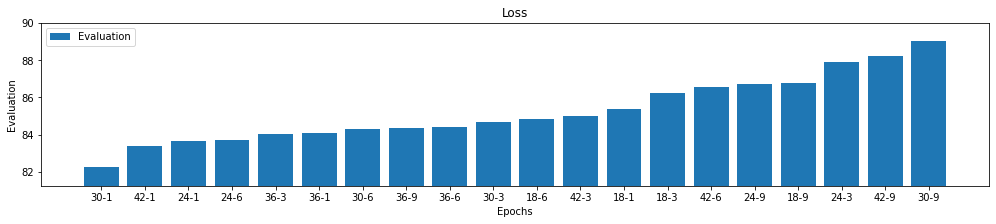

In [25]:
evaluations.sort(key=lambda elem : elem[0])

combinations = []
values = []
for evaluation in evaluations:
    values.append(evaluation[0])
    combinations.append(evaluation[1])

plt.rcParams['figure.figsize'] = (17,3)
plt.bar(combinations, values, label='Evaluation')
plt.title('Loss')
plt.ylim(min(values) - 1, max(values) + 1)
plt.xlabel('Epochs')
plt.ylabel('Evaluation')
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [26]:
print(f'Best result:\t\t\t{values[0]}')
print(f'Best window_size-window_shift:\t{combinations[0]}')

Best result:			82.24378204345703
Best window_size-window_shift:	30-1


## 1.4 Considerations about possible correlations
Now, we decide to build a model that takes in input all time series, in order to see if we can obtain more accurate results.

### 1.4.1 Data preprocessing
We reshape the data in order to have a feature set, containing records of a specific window size, and a label set, containing the next value for each window.

In [36]:
features = []
labels = []

for i in range(WINDOW_SIZE, len(data), WINDOW_SHIFT):
    features.append(data.to_numpy()[i - WINDOW_SIZE:i])
    labels.append(data.to_numpy()[i])
features, labels = np.array(features), np.array(labels)

print(features[0])
print(labels[0])

[[ -24  749 -626]
 [-206  930  -63]
 [-139  763 -577]
 [-503  441 -557]
 [-278  705 -396]
 [ 240  839 -310]
 [-671  318 -213]
 [ -45  296 -927]
 [ 102  294 -888]
 [  15  635 -671]
 [ 142  101 -945]
 [   3  143  543]
 [-176  368  629]
 [-768 -547  202]
 [-838 -509  194]
 [-420  306  885]
 [-419  307  885]
 [-420  308  884]
 [-419  309  885]
 [-418  309  885]
 [-417  310  884]
 [-414  312  885]
 [-408  315  887]
 [-407  315  887]
 [-407  316  887]
 [-408  316  887]
 [-407  315  887]
 [-408  316  887]
 [-408  316  887]
 [-409  316  887]]
[-408  316  887]


### 1.4.2 Data normalization

We use the standard scaler, in order to normalize features.

In [37]:
normalized_features = np.reshape(features, (-1, features.shape[-1]))

scaler = StandardScaler()
scaler.fit(normalized_features)
normalized_features = scaler.transform(normalized_features)

normalized_features = np.reshape(normalized_features, features.shape)
features = normalized_features
features[0]

array([[-0.31871224,  1.31732579, -0.59142138],
       [-0.68885218,  1.62155109,  0.45436087],
       [-0.55259187,  1.34085703, -0.50040303],
       [-1.29287176,  0.79963853, -0.46325269],
       [-0.83528117,  1.24337046, -0.1641924 ],
       [ 0.21819405,  1.46859804, -0.00444591],
       [-1.63453939,  0.59289978,  0.17573327],
       [-0.3614207 ,  0.55592212, -1.15053409],
       [-0.06246151,  0.55256052, -1.07809092],
       [-0.23939654,  1.12571427, -0.67500966],
       [ 0.01888792,  0.22816558, -1.1839694 ],
       [-0.26380137,  0.2987593 ,  1.58001636],
       [-0.6278401 ,  0.67693992,  1.73976285],
       [-1.83181178, -0.86099463,  0.94660296],
       [-1.9741733 , -0.79712412,  0.93174282],
       [-1.12407167,  0.57273015,  2.21528729],
       [-1.12203794,  0.57441095,  2.21528729],
       [-1.12407167,  0.57609176,  2.21342977],
       [-1.12203794,  0.57777256,  2.21528729],
       [-1.1200042 ,  0.57777256,  2.21528729],
       [-1.11797047,  0.57945336,  2.213

### 1.4.3 Splitting in training set and validation set
We are splitting the data in training data and validation data

In [38]:
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=7)

### 1.4.4 Hyperparameter search

We let the tuner look for the best parameters for each model.

In [39]:
tuner = keras_tuner.Hyperband(model_builder_three,
                              objective='val_mean_absolute_error',
                              max_epochs=15,
                              factor=3,
                              directory='task_1.3/tuner',
                              project_name='all')

tuner.search(train_features, train_labels, validation_data=(val_features, val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Reloading Oracle from existing project task_1.3/tuner/all/oracle.json
INFO:tensorflow:Reloading Tuner from task_1.3/tuner/all/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [40]:
print(f"""
The hyperparameter search is complete.
units_1:\t{best_hps.get('units_1')}
units_2:\t{best_hps.get('units_2')}
units_3:\t{best_hps.get('units_3')}
units_4:\t{best_hps.get('units_4')}
learning rate:\t{best_hps.get('learning_rate')}
""")


The hyperparameter search is complete.
units_1:	80
units_2:	64
units_3:	208
units_4:	208
learning rate:	0.001



### 1.4.5 Model building and fitting

We build the models according to the parameters found by tuner, then fit the data.

In [41]:
model = tuner.hypermodel.build(best_hps)

plot_model(model, to_file='task_1.3/models/model.png', show_shapes=True, show_layer_names=True)
if not exists('task_1.3/models/model.index'):
    model_checkpoint_callback = callbacks.ModelCheckpoint('task_1.3/models/model', save_weights_only=True, monitor='val_mean_absolute_error', mode='min', save_best_only=True)
    history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[model_checkpoint_callback])
    if exists('task_1.3/plots/loss.png'):
        remove('task_1.3/plots/loss.png')
    if exists('task_1.3/plots/mae.png'):
        remove('task_1.3/plots/mae.png')

### 1.4.6 Plotting losses and metrics

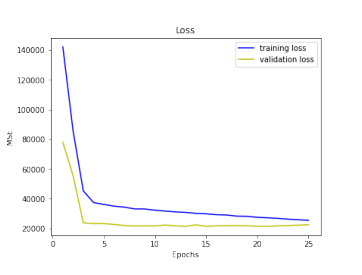

In [42]:
if not exists('task_1.3/plots/loss.png'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, loss, 'b', label='training loss')
    plt.plot(epochs, val_loss, 'y', label='validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.savefig('task_1.3/plots/loss.png')
    plt.show()
else:
    img = mpimg.imread('task_1.3/plots/loss.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

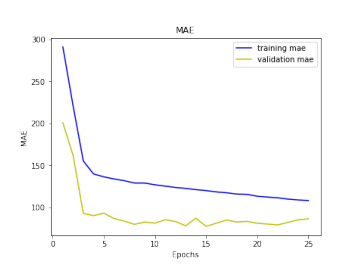

In [43]:
if not exists('task_1.3/plots/mae.png'):
    mae = history.history['mean_absolute_error']
    val_mae = history.history['val_mean_absolute_error']
    epochs = range(1, EPOCHS + 1)
    plt.plot(epochs, mae, 'b', label='training mae')
    plt.plot(epochs, val_mae, 'y', label='validation mae')
    plt.title('MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig('task_1.3/plots/mae.png')
    plt.show()
else:
    img = mpimg.imread('task_1.3/plots/mae.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

### 1.4.7 Evaluation

In [44]:
test_features = []
test_labels = []

for i in range(WINDOW_SIZE, len(data), WINDOW_SHIFT):
    test_features.append(test_data.to_numpy()[i - WINDOW_SIZE:i])
    test_labels.append(test_data.to_numpy()[i])
test_features, test_labels = np.array(test_features), np.array(test_labels)

normalized_test_features = np.reshape(test_features, (-1, test_features.shape[-1]))
normalized_test_features = scaler.transform(normalized_test_features)

normalized_test_features = np.reshape(normalized_test_features, test_features.shape)
test_features = normalized_test_features

model.load_weights('task_1.3/models/model')
evaluation = model.evaluate(test_features, test_labels)[1]
print(f'mean_absolute_error:\t{evaluation}')

755/755 [==============================] - 17s 21ms/step - loss: 27518.3887 - mean_absolute_error: 93.8679
mean_absolute_error:	93.86788177490234
